In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec # Для создания нестандартных subplots

import matplotlib_inline.backend_inline

# Ортогональные матрицы

In [33]:
# Указываем матрицы
Q1 = np.array([ [1, -1], [1, 1] ])  / np.sqrt(2)
Q2 = np.array([ [1, 2, 2], [2, 1, -2], [-2, 2, -1] ]) / 3

# Вычислим их произведение с транспонированными (должно получиться I)
print(np.round(Q1.T @ Q1)), print(' ')
print(np.round(Q2.T @ Q2))

[[1. 0.]
 [0. 1.]]
 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# QR-разложение

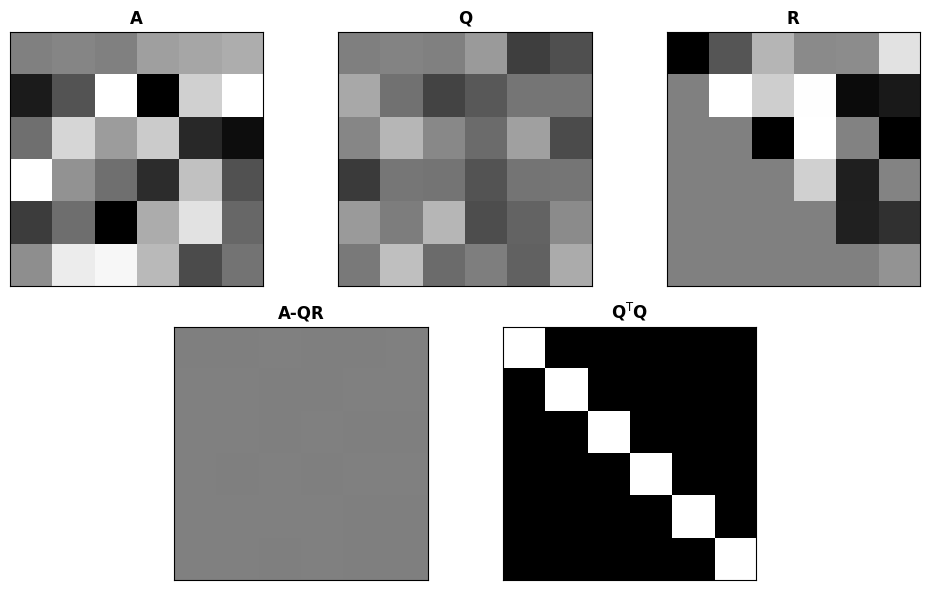

In [84]:
# Создадим матрицу случайных чисел
A = np.random.randn(6, 6)

# QR-разложение
Q, R = np.linalg.qr(A)

# Визуализируем матрицы
fig = plt.figure(figsize=(10, 6))
axs = [0] * 5
c = 1.5 # Пределы цвета

gs1 = gridspec.GridSpec(2, 6)
axs[0] = plt.subplot(gs1[0, 0:2])
axs[0].imshow(A, cmap='gray', vmin=-c, vmax=c)
axs[0].set_title('A', fontweight='bold')

axs[1] = plt.subplot(gs1[0, 2:4])
axs[1].imshow(Q, cmap='gray', vmin=-c, vmax=c)
axs[1].set_title('Q', fontweight='bold')

axs[2] = plt.subplot(gs1[0, 4:6])
axs[2].imshow(R, cmap='gray', vmin=-c, vmax=c)
axs[2].set_title('R', fontweight='bold')

axs[3] = plt.subplot(gs1[1, 1:3])
axs[3].imshow(A - Q@R, cmap='gray', vmin=-c, vmax=c)
axs[3].set_title('A-QR', fontweight='bold')

axs[4] = plt.subplot(gs1[1, 3:5])
axs[4].imshow(Q.T@Q, cmap='gray',)
axs[4].set_title(r'$\bf{Q}^{\rm{T}}Q$')

# Уберем оси
for a in axs:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.show()

In [96]:
# Размеры и ранги матриц Q и R в зависимости от исходной матрицы
n, m = 41, 14

A = np.random.randn(n, m)
Q, R = np.linalg.qr(A,)

# Выведем размеры матриц
print(f'Размер матрицы A: {A.shape}. Ранг матрицы A: {np.linalg.matrix_rank(A)}.')
print(f'Размер матрицы Q: {Q.shape}. Ранг матрицы Q: {np.linalg.matrix_rank(Q)}.')
print(f'Размер матрицы R: {R.shape}. Ранг матрицы R: {np.linalg.matrix_rank(R)}.')

Размер матрицы A: (41, 14). Ранг матрицы A: 14.
Размер матрицы Q: (41, 14). Ранг матрицы Q: 14.
Размер матрицы R: (14, 14). Ранг матрицы R: 14.


In [101]:
# Иллюстрация полной Q для матрицы A с M>N (Высокой)
A = np.array( [ [1, -1] ] ).T

Q,R = np.linalg.qr(A, 'complete')
Q * np.sqrt(2)

array([[-1.,  1.],
       [ 1.,  1.]])

# Упражнения по программированию

### Упражнение 1. Доказать тождества $\textbf{Q}^T\textbf{Q}=\textbf{QQ}^T=\textbf{Q}^{-1}\textbf{Q}=\textbf{QQ}^{-1}=\textbf{I}$ .

In [109]:
# Исходная случайная матрица
A = np.random.randn(5, 5)

# Ортогональная матрица Q
Q = np.linalg.qr(A)[0]
Qt = Q.T
Qi = np.linalg.inv(Q)

# QtQ
print(np.round(Qt@Q, 8), "\n")

# QQt
print(np.round(Q@Qt, 8), "\n")

# QiQ
print(np.round(Qi@Q, 8), "\n")

# QQi
print(np.round(Q@Qi, 8), "\n")

[[ 1.  0.  0. -0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0. -0.  1. -0.  0.]
 [-0.  0. -0.  1. -0.]
 [ 0.  0.  0. -0.  1.]] 

[[ 1. -0. -0. -0.  0.]
 [-0.  1.  0.  0. -0.]
 [-0.  0.  1.  0. -0.]
 [-0.  0.  0.  1. -0.]
 [ 0. -0. -0. -0.  1.]] 

[[ 1.  0. -0. -0.  0.]
 [-0.  1.  0.  0. -0.]
 [ 0.  0.  1.  0. -0.]
 [-0. -0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]] 

[[ 1.  0. -0.  0.  0.]
 [-0.  1.  0. -0.  0.]
 [ 0.  0.  1. -0.  0.]
 [-0.  0.  0.  1.  0.]
 [ 0. -0. -0.  0.  1.]] 



### Упражнение 2. Ортогонализация Грама-Шмидта.

In [149]:
# Создадим функцию, которая выполняет ортогонализацию квадратных матриц
def orthogonalizationGS(A):
    # Зададим форму для ортоганальной матрицы
    Q = np.zeros((A.shape))
    # Зададим циклом создание каждого столбца в Q
    for i in range(A.shape[1]):
        # Вынимаем вектор-строку
        q = A[:, i]
        # Ортогонализуем по всем предыдущим векторам
        for j in range(i):
            alpha_j = np.dot(q, Q[:,j].T) / np.linalg.norm(Q[:, j]) ** 2
            q = alpha_j * Q[:, j] - q

        # Приводим вектор к единичной норме
        q /= np.linalg.norm(q)
        # Помещаем полученный вектор в матрицу Q
        Q[:, i] = q

    return Q

In [150]:
# Создадим матрицу определнных размеров
n = 5
m = 5
A = np.random.randn(n, m)
# Ортогональная матрица с помощью ручной функции
Q1 = orthogonalizationGS(A)

# Ортогональная матрица с помощью numpy.linalg.qr
Q2 = np.linalg.qr(A)[0]

# Покажем их равенство, учитывая, что некоторые столбцы могут быть развернуты (умножены на -1) по сравнению с процессом Грама-Шмидта
print(np.round(Q2 - Q1, 10), '\n')
print(np.round(Q2 + Q1, 10))

[[-1.52394848  0.          0.2395213  -0.88875729  0.69248054]
 [-0.93409366  0.         -0.45503722  1.43387394 -0.63712307]
 [-0.11308338  0.         -1.90632155 -0.4037435   0.21621054]
 [ 0.77465306  0.         -0.23250407  0.42980674  1.29374899]
 [-0.43837754  0.          0.21783175  0.89798294  1.18068262]] 

[[ 0.         -0.59227676 -0.         -0.          0.        ]
 [-0.         -0.67711882  0.          0.         -0.        ]
 [ 0.          0.37867463 -0.          0.         -0.        ]
 [ 0.         -1.21956312 -0.          0.         -0.        ]
 [ 0.          1.24899546  0.         -0.         -0.        ]]


### Упражнение 3. Применение QR разложения к "почти ортогональной матрице".

In [235]:
# Шаг 1
# Создадим ортогональную матрицу U
U = np.linalg.qr(np.random.randn(6, 6))[0]

# Вычислим QR разложения для ортогональной матрицы U. Убедимся, что R=I
Q, R = np.linalg.qr(U)
print(np.round(R,8), '\n')

# Шаг 2
# Изменим нормы столбцов матрицы U
for i, j in enumerate(range(10, 16)):
    U[:, i] *= j
# Вычислим QR разложения для получившейся матрицы U
Q, R = np.linalg.qr(U) # R диагональная матрица по понятым причинам
print(np.round(R, 8), '\n')
print(np.round(Q.T@Q, 8), '\n')

# Шаг 3
# Изменим элемент u[1,4]=0
U = np.linalg.qr(np.random.randn(6, 6))[0]
U[0, 3] = 0
# Вычислим QR разложения для получившейся матрицы U
Q, R = np.linalg.qr(U)
print(np.round(R, 3), '\n')

[[ 1.  0.  0.  0. -0. -0.]
 [ 0.  1. -0. -0. -0.  0.]
 [ 0.  0.  1. -0. -0. -0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1. -0.]
 [ 0.  0.  0.  0.  0.  1.]] 

[[10. -0. -0.  0.  0. -0.]
 [ 0. 11.  0. -0. -0.  0.]
 [ 0.  0. 12. -0. -0.  0.]
 [ 0.  0.  0. 13.  0.  0.]
 [ 0.  0.  0.  0. 14. -0.]
 [ 0.  0.  0.  0.  0. 15.]] 

[[ 1. -0. -0.  0.  0. -0.]
 [-0.  1. -0.  0.  0. -0.]
 [-0. -0.  1. -0.  0.  0.]
 [ 0.  0. -0.  1.  0. -0.]
 [ 0.  0.  0.  0.  1. -0.]
 [-0. -0.  0. -0. -0.  1.]] 

[[ 1.    -0.    -0.     0.036  0.     0.   ]
 [ 0.     1.    -0.     0.118 -0.     0.   ]
 [ 0.     0.     1.     0.058  0.     0.   ]
 [ 0.     0.     0.     0.98  -0.008 -0.052]
 [ 0.     0.     0.     0.     1.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.999]] 



### Упражнение 4. Сравнение численных ошибок при обращении матрицы "традиционным" способом и с помощью QR-разложения.

In [3]:
# Функция, вычисляющая обратную матрицу
def Inversion(M, image=True):
    ''' Функция вычисляет обратную матрицу к данной. Если значение image=True, то выводятся изображения матриц миноров, решетки, кофакторов, 
    обратной матрицы, обратной из np.linalg.inv() и произведение начальной матрицы на обратную.
    '''
    # Проверка на размерность
    if M.shape[0] != M.shape[1]:
        raise Exception('Матрица должна быть квадратной!')
    # Проверка на ранг
    if M.shape[0] != np.linalg.matrix_rank(M):
        raise Exception('Сингулярная матрица не имеет обратной!')
    # Размер матрицы
    n = M.shape[0]
    # Основа для обратной матрицы
    invers = np.zeros((n, n))
    # Далее создаем матрицу миноров
    minors = np.zeros((n, n))
    for (i, j), _ in np.ndenumerate(minors):
        minor = np.delete(np.delete(M, j, 1), i, 0)
        minors[i, j] = np.linalg.det(minor)
    # Создадим матрицу-решетку
    grid = np.zeros((n, n))
    for (i, j), _ in np.ndenumerate(grid):
        grid[i, j] = (-1) ** (i + j)
    # Матрица кофакторов
    cofactors = grid * minors
    # Матрица присоединений (обратная матрица)
    inv = cofactors.T / np.linalg.det(M)

    # Изобразим матрицы
    if image:
        # Подготовим list для цикла for
        matrixes = [minors, grid, cofactors, inv, np.linalg.inv(M), M@inv]
        titles = ['Матрица миноров', 'Матрица-решетка', "Матрица кофакторов", 'Обратная матрица', 'Обратная матрица из np.linalg', 'M@Minv']
        fig, axs = plt.subplots(2, 3, figsize=(14, 7))
        ax = axs.flatten()
        for i in range(6):
            ax[i].imshow(matrixes[i], cmap='gray', vmin=np.min(matrixes[i]), vmax=np.max([matrixes[i]]))
            ax[i].set_title(titles[i])
            ax[i].set_xticks([])
            ax[i].set_yticks([])
        plt.show()
    return inv

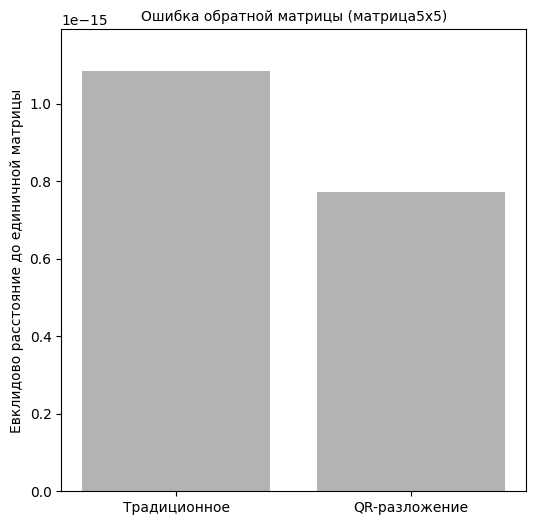

In [10]:
# Случайная матрица nхn
n = 5
A = np.random.randn(n, n)

# Единичная матрица nхn
I = np.eye(n)

# Обратная матрица "традиционным способом"
Ainv_traditional = Inversion(A, image=False)

# Обратная матрица с помощью QR-разложения
Q, R = np.linalg.qr(A)
Rinv = Inversion(R, image=False)
Ainv_QR = Rinv @ Q.T

# Рассчитаем расстояние от единичной матрицы до произведений матрицы A на её обратные
sse = [0, 0] # sse - sum of squared error
sse[0] = np.linalg.norm(Ainv_traditional@A-I)
sse[1] = np.linalg.norm(Ainv_QR@A-I)

# Визуализируем с помощью bar
plt.figure(figsize=(6, 6))
plt.bar(range(2), sse, color=[.7, .7, .7])
plt.ylim([0, np.max(sse)*1.1])
plt.xticks(range(2), labels=['Традиционное', 'QR-разложение'])
plt.title(f'Ошибка обратной матрицы (матрица{n}х{n})', fontsize=10, ha='center')
plt.ylabel('Евклидово расстояние до единичной матрицы')
plt.show()

### Упражнение 5. Продолжение предыдущего упражнения. Необходимо циклом повторить эксперимент и визуализировать точность при различных размерах матрицы.

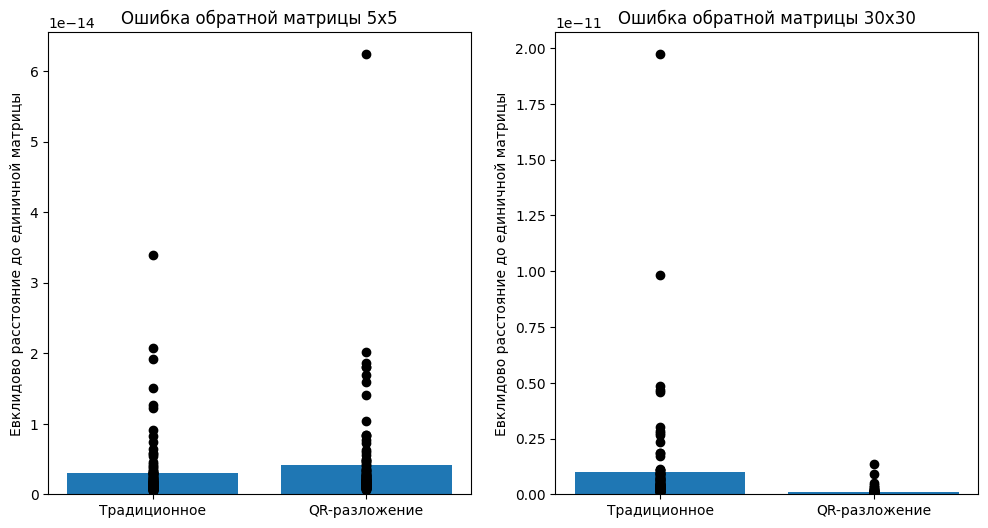

In [69]:
def Experiment(Nexp):
    
    sse = np.zeros((100, 2)) # sse - sum of squared error
    for i in range(100):
        n = Nexp
        A = np.random.randn(n, n)
        
        # Единичная матрица nхn
        I = np.eye(n)
        
        # Обратная матрица "традиционным способом"
        Ainv_traditional = Inversion(A, image=False)
        
        # Обратная матрица с помощью QR-разложения
        Q, R = np.linalg.qr(A)
        Rinv = Inversion(R, image=False)
        Ainv_QR = Rinv @ Q.T
        
        # Рассчитаем расстояние от единичной матрицы до произведений матрицы A на её обратные
        sse[i, 0] = np.linalg.norm(Ainv_traditional@A-I)
        sse[i, 1] = np.linalg.norm(Ainv_QR@A-I)
    return sse
# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(12,6))
for i, Exp in enumerate([5, 30]):
    sse = Experiment(Exp)
    x = np.hstack(( np.zeros((100, 1)) , np.ones((100, 1)))) # Для построения точек
    sse_mean = np.mean(sse, axis=0)
    axs[i].bar(range(2), sse_mean)
    axs[i].plot(x, sse, 'ko')
    axs[i].set_title(f'Ошибка обратной матрицы {Exp}x{Exp}')
    axs[i].set_xticks(range(2), labels=['Традиционное', 'QR-разложение'])
    axs[i].set_ylabel('Евклидово расстояние до единичной матрицы')

### Упражнение 6. Сингулярные значения ортогональной матрицы и нормы векторов, умноженных на ортогональную матрицу.

In [10]:
# Создадим случайную ортогональную матрицу
n = 5
Q, _ = np.linalg.qr(np.random.randn(m, m))

# Вычислим индуцированную норму и Фробениусову норму, деленную на квадратный корень из m
norm_np = np.linalg.norm(Q, 2)
norm_fr = np.sqrt(np.sum(Q ** 2)) / np.sqrt(m)
print(norm_fr, norm_np)

0.9999999999999998 1.0000000000000004


In [16]:
# Исследуем норму вектора и вектора, умноженного на ортогональную матрицу
# Случайный вектор
v = np.random.randn(n, 1)

# Нормы
norm_v = np.linalg.norm(v)
norm_Qv = np.linalg.norm(Q@v)

print(norm_v)
print(norm_Qv)

1.9719720441665118
1.9719720441665116


Докажем аналитически. Норма вектора по определению: $ \textbf{||Qv||} = (\textbf{Qv})^{\rm T}\textbf{Qv}=\textbf{v}^{\rm T}\textbf{Q}^{\rm T} 
\textbf{Qv} = \textbf{v}^{\rm T}\textbf{v} = ||\textbf{v}||$

### Упражнение 7. Особенность матрицы $ \textbf R $, использующаяся в МНК.

In [42]:
# Высокая полноранговая матрица А размером MxN
A = np.random.randn(10, 4)
# Извлекаем матрицу R
Q, R = np.linalg.qr(A, 'complete')
# Покажем R
print('Матрица R:')
print(np.round(R, 4))

Матрица R
[[ 4.1023 -1.3249 -0.3624  0.0867]
 [ 0.      2.3851  1.0148  0.0055]
 [ 0.      0.     -3.5743  0.9806]
 [ 0.      0.      0.      1.6737]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]]


In [45]:
# Проврим два утверждения об R
# 1. Подматрица, состоящая из первых N строк является квадратной и полноранговой, значит имеет обратную
Rsub = R[0:4, 0:4]
print('Подматрица R 4х4:')
print(np.round(Rsub, 3), '\n')
Rsub_inv = np.linalg.inv(Rsub)
print('Обратная матрицы к квадратной выше:')
print(np.round(Rsub_inv, 3), '\n')

# 2. Высокая матрица R имеет псевдообратную матрицу
R_leftinv = np.linalg.pinv(R)
print('Левообратная матрица к R:')
print(np.round(R_leftinv, 3))

Подматрица R 4х4:
[[ 4.102 -1.325 -0.362  0.087]
 [ 0.     2.385  1.015  0.005]
 [ 0.     0.    -3.574  0.981]
 [ 0.     0.     0.     1.674]] 

Обратная матрицы к квадратной выше:
[[ 0.244  0.135  0.014 -0.021]
 [ 0.     0.419  0.119 -0.071]
 [-0.    -0.    -0.28   0.164]
 [ 0.     0.     0.     0.597]] 

Левообратная матрица к R:
[[ 0.244  0.135  0.014 -0.021  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.419  0.119 -0.071  0.     0.     0.     0.     0.     0.   ]
 [-0.     0.    -0.28   0.164  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.    -0.     0.597  0.     0.     0.     0.     0.     0.   ]]
